# Assignment 4
** Creating reusable network analysis pipeline **



This exercise is building directly on the work we did in class. I want you to take the code we developed together and in you groups and turn it into a reusable command-line tool. You can see the code from class here:



https://github.com/CDS-AU-DK/cds-language/blob/main/notebooks/session6.ipynb



This command-line tool will take a given dataset and perform simple network analysis. In particular, it will build networks based on entities appearing together in the same documents, like we did in class.



- Your script should be able to be run from the command line
- It should take any weighted edgelist as an input, providing that edgelist is saved as a CSV with the column headers "nodeA", "nodeB"
- For any given weighted edgelist given as an input, your script should be used to create a network visualization, which will be saved in a folder called viz.
- It should also create a data frame showing the degree, betweenness, and eigenvector centrality for each node. It should save this as a CSV in a folder called output.


** Tips **

- You should use argparse() in the Python standard library
- Your code should contain a main() function
- Don't worry too much about efficiency - networkx is really slow, there's no way around i!
- If you have issues with pygraphviz, just use the built-in matplotlib functions in networkx.
- You may want to create an argument for the user to define a cut-off point to filter data. E.g. only include node pairs with more than a certain edge weight.
- Make sure to use all of the Python scripting skills you've learned so far, including in the workshops with Kristoffer Nielbo


** Bonus challenges **

- Attempt to implement coreference resolution on entities (time-consuming)
- Bundle your code up into a Python class, focusing on code modularity
- Let the user define which graphing algorithm they use (pretty tricky)
- Are there other ways of creating networks, rather than just document co-occurrence? (really tricky)


** General instructions **

- For this assignment, you should upload a standalone .py script which can be executed from the command line
- Save your script as network.py
- You must include a requirements.txt file and a bash script to set up a virtual environment for the project. You can use those on worker02 as a template
- You can either upload the scripts here or push to GitHub and include a link - or both!
- Your code should be clearly documented in a way that allows others to easily follow the structure of your script and to use them from the command line


** Purpose **

This assignment is designed to test that you have an understanding of:

- how to create command-line tools with Python;
- how to perform network analysis using networkx;
- how to create resuable and reproducible pipelines for data analysis.

In [54]:
from collections import Counter
from itertools import combinations
from tqdm import tqdm
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import spacy
nlp = spacy.load("en_core_web_sm")


In [55]:
weighted_edgelist = pd.read_csv(os.path.join("..","data","weighted_edgelist.csv"), index_col = 0)
weighted_edgelist = weighted_edgelist[weighted_edgelist["weight"]>100]

In [56]:
weighted_edgelist

,nodeA,nodeB,weight
1,Clinton,Hillary Clinton,345
4,Clinton,Clinton,1722
5,Bernie Sanders,Clinton,148
12,Clinton,Hillary,113
14,Clinton,Sanders,204
336,Obama,Obama,357
406,Clinton,Obama,375
414,Clinton,Donald Trump,153
479,Cruz,Cruz,370
486,Cruz,Rubio,132


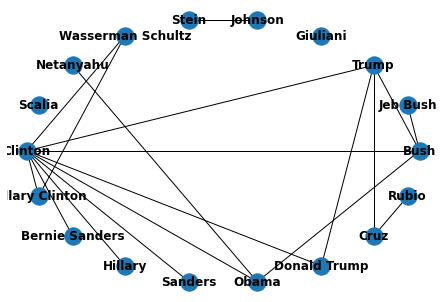

NameError: name 'save' is not defined

In [65]:
# Create a graph from the edgelist
G = nx.from_pandas_edgelist(weighted_edgelist, 'nodeA', 'nodeB', ["weight"])

# Plot (horrible - couldn't make it neat without pygraphviz locally on windows)
nx.draw_shell(G, with_labels = True, font_weight= 'bold') 
plt.show()

# Calc centrality measures
ev = pd.DataFrame(nx.eigenvector_centrality(G).items(), columns=['node', 'eigenvector_centrality'])
bc = pd.DataFrame(nx.betweenness_centrality(G).items(), columns=['node', 'betweenness_centrality'])
dg = pd.DataFrame(nx.degree_centrality(G).items(), columns=['node', 'degree_centrality'])

# Make into a df
ev = ev.merge(bc, on = "node")
node_importance = ev.merge(dg, on = "node")

if save == True:
    # Save the centrality measures in the folder "output" (and create the folder if it doesn't already exist)
    if not os.path.exists(os.path.join("..", "data", "output")):
        os.makedirs(os.path.join("..", "data", "output"))
    node_importance.to_csv(os.path.join("..", "data", "output", "node_importance.csv"))

    # Save the horrible plot in the folder "viz"  (and create the folder if it doesn't already exist)
    if not os.path.exists(os.path.join("..", "data", "output")):
        os.makedirs(os.path.join("..", "data", "output"))
    plt.savefig(os.path.join("..", "data", "viz", "network_viz.png"), dpi=300, bbox_inches="tight")

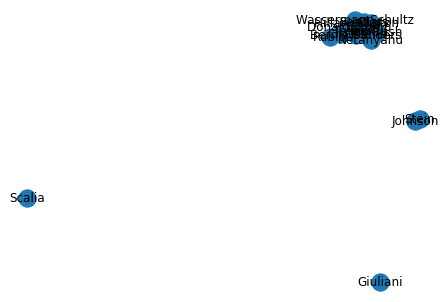

In [41]:
if not os.path.exists(os.path.join("..", "data", "output")):
    os.makedirs(os.path.join("..", "data", "output"))
node_importance.to_csv(os.path.join("..", "data", "output", "node_importance.csv"))

In [9]:
node_importance

,node,eigenvector_centrality,betweenness_centrality,degree_centrality
0,Clinton,0.736976,0.333333,1.333333
1,Cruz,0.000005,0.000000,0.666667
2,Trump,0.591009,0.000000,1.000000
3,Reagan,0.327985,0.000000,0.333333
